## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

%matplotlib inline

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import TimeSeriesSplit

## Reading the CSV file

In [2]:
df = pd.read_csv("NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv", parse_dates = True, index_col='Date')

In [3]:
# Just copying to another variable df1 for further analysis
df1 = df

In [4]:
# Displaying the 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [5]:
# Displaying the all columns
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Shape of dataframe
df.shape

(1481, 6)

so we have 1481 rows and 7 columns.

In [7]:
# Checking for null values
df.isnull().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [12]:
# We are dropping the rows who has null value. We can also fill them with some another value
# but let's go with this approach
df.dropna(inplace = True, axis=0)

In [9]:
df.shape

(1475, 6)

So we have delted the 6 rows

### Time Series plot of Adj Close 

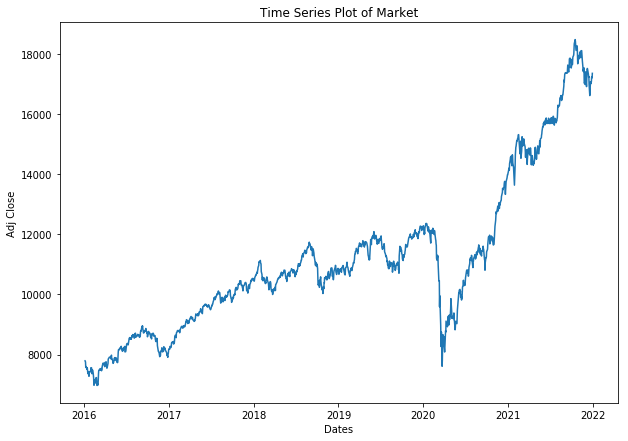

In [10]:
plt.figure(figsize = (10,7))
plt.plot(df.index.values, df['Adj Close'])
plt.title("Time Series Plot of Market")
plt.xlabel("Dates")
plt.ylabel("Adj Close")
plt.show()

From the above plot it is clear that the market has fallen down in at start of the 2020 (may be becuase of COVID) and it is at it max at the end of 2021.


Let's plot smoothen time series plot along with the original plot to get more visibility on market trend. We will use pandas rolling_mean() function to achieve same.

In [11]:
df1.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1, inplace = True)

In [12]:
rolling = df1.rolling(window = 3)
rolling_mean = rolling.mean()

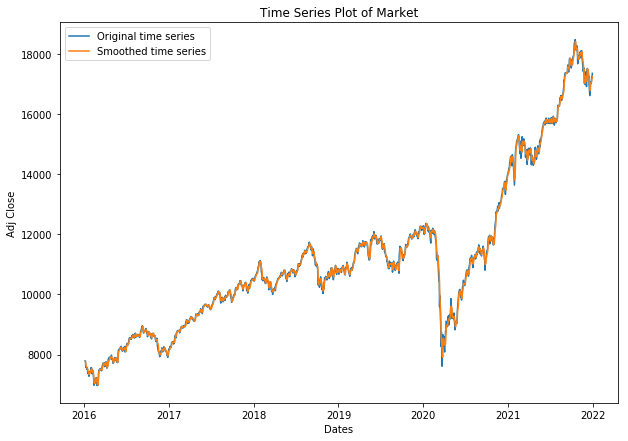

In [13]:
plt.figure(figsize = (10,7))
plt.plot(df.index.values, df['Adj Close'], label = 'Original time series')
plt.plot(df.index.values, rolling_mean, label = 'Smoothed time series')
plt.legend()
plt.title("Time Series Plot of Market")
plt.xlabel("Dates")
plt.ylabel("Adj Close") 
plt.show()

Report the scale-dependent Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the method in the errors between your smoothed prices and the true prices.

Checking for the null values if any

In [14]:
rolling_mean.isnull().sum()

Adj Close    2
dtype: int64

In [15]:
# Filling the null values with the mean.
rolling_mean.fillna(rolling_mean.mean(), inplace = True)

In [16]:
rmse = sqrt(mean_squared_error(df['Adj Close'], rolling_mean))
mae = mean_absolute_error(df['Adj Close'], rolling_mean)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)

Root Mean Squares Error (RMSE):  153.65872867862603
Mean Absolute Error (MAE):  67.28371509392174


### CMA-5 Method

Using CMA-5 forecasting methods to forecast the last TEN weeks i.e. from 2021-10-31 to 2022-01-01

In [17]:
# Filtering the values based on the date mentioned.
print(df1.loc['2021-10-31':'2022-01-01'])

               Adj Close
Date                    
2021-11-01  17929.650391
2021-11-02  17888.949219
2021-11-03  17829.199219
2021-11-04  17916.800781
2021-11-08  18068.550781
2021-11-09  18044.250000
2021-11-10  18017.199219
2021-11-11  17873.599609
2021-11-12  18102.750000
2021-11-15  18109.449219
2021-11-16  17999.199219
2021-11-17  17898.650391
2021-11-18  17764.800781
2021-11-22  17416.550781
2021-11-23  17503.349609
2021-11-24  17415.050781
2021-11-25  17536.250000
2021-11-26  17026.449219
2021-11-29  17053.949219
2021-11-30  16983.199219
2021-12-01  17166.900391
2021-12-02  17401.650391
2021-12-03  17196.699219
2021-12-06  16912.250000
2021-12-07  17176.699219
2021-12-08  17469.750000
2021-12-09  17516.849609
2021-12-10  17511.300781
2021-12-13  17368.250000
2021-12-14  17324.900391
2021-12-15  17221.400391
2021-12-16  17248.400391
2021-12-17  16985.199219
2021-12-20  16614.199219
2021-12-21  16770.849609
2021-12-22  16955.449219
2021-12-23  17072.599609
2021-12-24  17003.750000


In [18]:
adj_close = df1['Adj Close'].loc['2021-10-31':'2022-01-01'].values

In [19]:
y0 = df1['Adj Close'].loc['2021-10-25']
y1 = df1['Adj Close'].loc['2021-10-18']
y2 = df1['Adj Close'].loc['2021-10-11']
y3 = df1['Adj Close'].loc['2021-10-04']
y4 = df1['Adj Close'].loc['2021-09-27']

In [20]:
cma5 = []
for values in adj_close:
    sum = y0 + y1 + y2 + y3 + y4
    cma5.append(sum/5)
    y0 = values
    y1 = y0
    y2 = y1
    y3 = y2
    y4 = y3

In [21]:
print("*****************RMSE and MAE for CMA-5*****************")
rmse = sqrt(mean_squared_error(cma5, adj_close))
mae = mean_absolute_error(cma5, adj_close)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)

*****************RMSE and MAE for CMA-5*****************
Root Mean Squares Error (RMSE):  174.8471487417198
Mean Absolute Error (MAE):  136.33495634883747


### Weighted MA-5 Method

In [22]:
y0 = df1['Adj Close'].loc['2021-10-25']
y1 = df1['Adj Close'].loc['2021-10-18']
y2 = df1['Adj Close'].loc['2021-10-11']
y3 = df1['Adj Close'].loc['2021-10-04']
y4 = df1['Adj Close'].loc['2021-09-27']


ma5 = []
for values in adj_close:
    sum = y0 + 2 * y1 + 3 * y2 + 2 * y3 + y4
    ma5.append(sum/9)
    y0 = values
    y1 = y0
    y2 = y1
    y3 = y2
    y4 = y3

In [23]:
print("\n *****************RMSE and MAE for weighted MA-5*****************")
rmse = sqrt(mean_squared_error(ma5, adj_close))
mae = mean_absolute_error(ma5, adj_close)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)


 *****************RMSE and MAE for weighted MA-5*****************
Root Mean Squares Error (RMSE):  174.82675879897482
Mean Absolute Error (MAE):  136.29464425323013


Let's check whether this time series {𝑟!: 𝑡 = 2, 3,…, 𝑇} is more predictable then the original time series {𝑌!: 𝑡 = 1, 2,…, 𝑇}.

where r! = log(y(t)/y(t-1))

In [24]:
rt = []
for i in range(1, len(df['Adj Close'])):
    val = df['Adj Close'][i] / df['Adj Close'][i-1]
    ans = np.log(val)
    rt.append(ans)

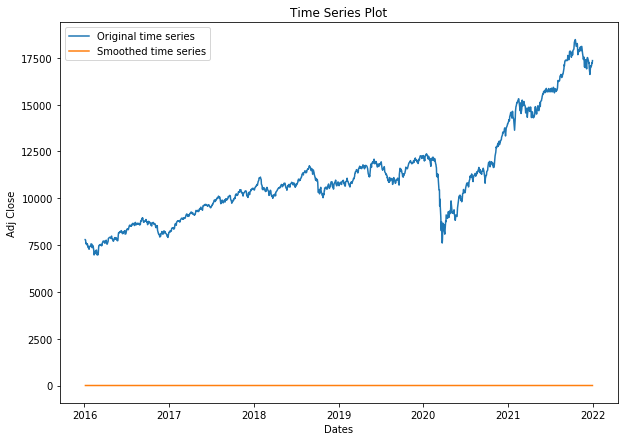

In [25]:
plt.figure(figsize = (10,7))
plt.plot(df.index.values, df['Adj Close'], label = 'Original time series')
plt.plot(df.index[1:].values, rt, label = 'Smoothed time series')
plt.legend()
plt.title("Time Series Plot")
plt.xlabel("Dates")
plt.ylabel("Adj Close")
plt.show()

### Holt’s linear

Implementation of Holt’s linear trend method on the returns time series. Below is a Python function taking at least three arguments, the time series to be smoothed, the smoothing parameter for level α and the smoothing parameter for the trend β, and returns the smoothed time series, by the Component form at https://otexts.com/fpp2/holt.html. 

In [26]:
def holts_linear(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          value = result[-1]
        else:
          value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    print("RMSE for alpha = {} and beta = {}".format(alpha, beta))
    rmse = sqrt(mean_squared_error(result, rt))
    print("Root Mean Squares Error (RMSE): ", rmse)

In [27]:
holts_linear(rt, 0.2, 0.4)

RMSE for alpha = 0.2 and beta = 0.4
Root Mean Squares Error (RMSE):  0.010051200246451106


In [28]:
holts_linear(rt, 0.2, 0.6)

RMSE for alpha = 0.2 and beta = 0.6
Root Mean Squares Error (RMSE):  0.010308608244623745


In [29]:
holts_linear(rt, 0.6, 0.2)

RMSE for alpha = 0.6 and beta = 0.2
Root Mean Squares Error (RMSE):  0.005107642944199039


In [30]:
holts_linear(rt, 0.8, 0.2)

RMSE for alpha = 0.8 and beta = 0.2
Root Mean Squares Error (RMSE):  0.0023828616901908324


Now we can compare the RMSE result between rolling_mean(), CMA-5 method, weighted MA-5 method and Holt's liner method.

### LSTM Models

Now let's try with more sophasticated algorithms like LSTMs.

In [13]:
# Separating X and y from dataframe
y = pd.DataFrame(df['Adj Close'])
x = ['Open', 'High', 'Low', 'Volume']

In [14]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
data = std.fit_transform(df[x])
data = pd.DataFrame(columns = x, data = data, index = df.index)

y_std = MinMaxScaler()
y = y_std.fit_transform(y)
y = pd.DataFrame(data = y)

In [17]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(data):
        X_train, X_test = data[:len(train_index)], data[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [18]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [19]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history=lstm.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, shuffle=False)

Epoch 1/30
1341/1341 [==============================] - 2s 1ms/step - loss: 0.0027
Epoch 2/30
1341/1341 [==============================] - 1s 448us/step - loss: 0.0031
Epoch 3/30
1341/1341 [==============================] - 1s 459us/step - loss: 8.6988e-04
Epoch 4/30
1341/1341 [==============================] - 1s 454us/step - loss: 2.5065e-04
Epoch 5/30
1341/1341 [==============================] - 1s 447us/step - loss: 9.9584e-05
Epoch 6/30
1341/1341 [==============================] - 1s 467us/step - loss: 6.2072e-05
Epoch 7/30
1341/1341 [==============================] - 1s 490us/step - loss: 5.1594e-05 0s - loss:
Epoch 8/30
1341/1341 [==============================] - 1s 500us/step - loss: 4.8504e-05
Epoch 9/30
1341/1341 [==============================] - 1s 495us/step - loss: 4.7398e-05
Epoch 10/30
1341/1341 [==============================] - 1s 513us/step - loss: 4.6922e-05
Epoch 11/30
1341/1341 [==============================] - 1s 495us/step - loss: 4.6956e-05
Epoch 12/30
1341/1

In [21]:
# Predicting on X_test
y_pred= lstm.predict(X_test)

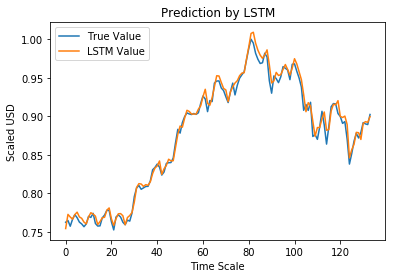

In [22]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [23]:
print("\n *****************RMSE and MAE for LSTM*****************")
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)


 *****************RMSE and MAE for LSTM*****************
Root Mean Squares Error (RMSE):  0.007368325499079721
Mean Absolute Error (MAE):  0.005658015348078246


Here we can see thaat the RMSE value has been decreased a lot.

Now let's add 128 units of LSTM and train again for 30 epochs.

In [25]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(128, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
history=lstm.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, shuffle=False)

Epoch 1/30
1341/1341 [==============================] - 2s 2ms/step - loss: 0.0025
Epoch 2/30
1341/1341 [==============================] - 1s 683us/step - loss: 0.0026
Epoch 3/30
1341/1341 [==============================] - 1s 982us/step - loss: 9.3587e-04
Epoch 4/30
1341/1341 [==============================] - 1s 690us/step - loss: 3.1513e-04
Epoch 5/30
1341/1341 [==============================] - 1s 777us/step - loss: 1.1835e-04
Epoch 6/30
1341/1341 [==============================] - 1s 728us/step - loss: 6.2290e-05
Epoch 7/30
1341/1341 [==============================] - 1s 722us/step - loss: 4.9784e-05
Epoch 8/30
1341/1341 [==============================] - 1s 920us/step - loss: 4.5519e-05 0s
Epoch 9/30
1341/1341 [==============================] - 1s 734us/step - loss: 4.3701e-05
Epoch 10/30
1341/1341 [==============================] - 1s 704us/step - loss: 4.3189e-05
Epoch 11/30
1341/1341 [==============================] - 1s 694us/step - loss: 4.4101e-05
Epoch 12/30
1341/1341 [===

In [27]:
# Predicting on X_test
y_pred= lstm.predict(X_test)

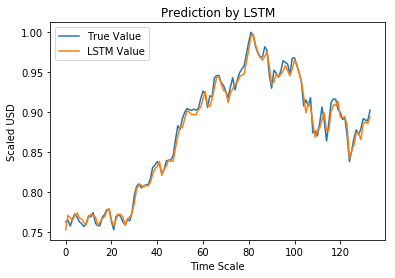

In [28]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [29]:
print("\n *****************RMSE and MAE for LSTM*****************")
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)


 *****************RMSE and MAE for LSTM*****************
Root Mean Squares Error (RMSE):  0.006968763148436176
Mean Absolute Error (MAE):  0.005589641408835556


Not much difference in RMSE and MAE values.

### Actual test data

In [31]:
df_test = pd.read_csv('NSE Data/NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv',  na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
x = ['Open', 'High', 'Low', 'Volume']
y = pd.DataFrame(df_test['Adj Close'])

#### IMPORTANT

Here we are using the trained mean and std deviation on test data. We cannot use new mean and std deviation on test data.

In [38]:
std_test = std.transform(df_test[x])
std_test = pd.DataFrame(columns = x, data = std_test, index = df_test.index)

y = y_std.transform(y)
y = pd.DataFrame(data = y)#, index = market.index)

In [40]:
std_test = np.array(std_test)
std_test = std_test.reshape(std_test.shape[0],1,std_test.shape[1])

In [41]:
y = np.array(y).reshape(-1)

In [42]:
out_of_time_prediction = lstm.predict(std_test)

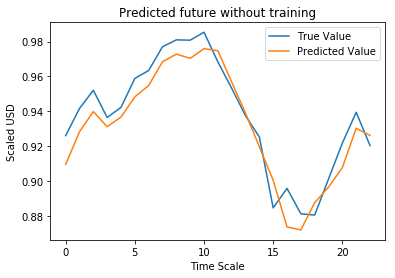

In [43]:
import matplotlib. pyplot as plt
plt.plot(y, label = 'True Value')
plt.plot(out_of_time_prediction, label = 'Predicted Value')
plt.title("Predicted future without training")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [44]:
print("\n *****************RMSE and MAE for LSTM*****************")
rmse = sqrt(mean_squared_error(out_of_time_prediction, y))
mae = mean_absolute_error(out_of_time_prediction, y)
print("Root Mean Squares Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)


 *****************RMSE and MAE for LSTM*****************
Root Mean Squares Error (RMSE):  0.010392586840323752
Mean Absolute Error (MAE):  0.009298837351382459


By looking at the result we can say that we have achieved the good RMSE and MAE error.